# 1. Import required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
import skimage
from skimage.filters.thresholding import threshold_li,threshold_local,threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, remove_small_objects, ball
from skimage.morphology import disk
from scipy import ndimage as ndi
import sys,os, glob

#import skimage.filters.median

#import skimage.segmentation as seg
#import skimage.filters as filters
#import skimage.draw as draw
#import skimage.color as color

#from skimage.filters.thresholding import _cross_entropy
#from skimage.morphology import black_tophat, skeletonize, convex_hull_image


#pip install nd2reader_required for nd2 file reading
from nd2reader import ND2Reader

import pandas as pd

c:\programdata\anaconda3\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


# 2. Define common parameters for measurement loading here:

In [2]:
# load experiment exp1

analysis_fd = r'D:\Analyzed_CellBio\Stam\210930IF_210921_U2OS_noco45h\cov1_H3K27ac_PolS5\analysis_subset_controlled'

exp1_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [3]:
# load experiment exp2

analysis_fd = r'D:\Analyzed_CellBio\Stam\211108IF_211101_U2OS_noco45h\cov1_H3K27ac_PolS5\analysis_subset_controlled'

exp2_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [4]:
combined_df = pd.concat([exp1_df,exp2_df])

len(combined_df)


measurement_for_all_fov_df = combined_df

In [6]:
len(combined_df)

280

# 3. Post-hoc analysis examples

In [5]:
#len(measurement_for_all_fov_df)


analysis_save_path = r'D:\Analyzed_CellBio\Stam\Mdc1_fixed_analysis'

analysis_savename = 'u2os_h3k27_pol2_analyzed.xlsx'

In [7]:
# remove the bad cell that has no Pol2 signal
analysis_df=measurement_for_all_fov_df[measurement_for_all_fov_df['ave_intensity_control_chr_Pol2S5']>0].copy()

len(analysis_df)

analysis_df.to_excel(analysis_save_path+os.sep+analysis_savename, index=False)

In [8]:
# remove the bad cell that has no Pol2 signal
#analysis_df=measurement_for_all_fov_df[measurement_for_all_fov_df['ave_intensity_control_chr_Pol2S5']>0].copy()

# for total incorporated chr
analysis_df['normalized_inc_Pol2S5']=analysis_df['ave_intensity_incorporated_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_inc_Pol2S5'].mean())


# for subset control
analysis_df['normalized_subset_control_Pol2S5']=analysis_df['ave_intensity_subset_control_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_subset_control_Pol2S5'].mean())



# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['normalized_inc_H3K27ac'] = analysis_df['ave_intensity_incorporated_chr_H3K27ac']/analysis_df['ave_intensity_nucleo-excluded_control_chr_H3K27ac']
print(analysis_df['normalized_inc_H3K27ac'].mean())


# for subset control
analysis_df['normalized_subset_control_H3K27ac']=analysis_df['ave_intensity_subset_control_chr_H3K27ac']/analysis_df['ave_intensity_nucleo-excluded_control_chr_H3K27ac']
print(analysis_df['normalized_subset_control_H3K27ac'].mean())






# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['normalized_inc_Mdc1'] = analysis_df['ave_intensity_incorporated_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
print(analysis_df['normalized_inc_Mdc1'].mean())


# for subset control
analysis_df['normalized_subset_control_Mdc1']=analysis_df['ave_intensity_subset_control_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
print(analysis_df['normalized_subset_control_Mdc1'].mean())





# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['normalized_inc_dna'] = analysis_df['ave_intensity_incorporated_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
print(analysis_df['normalized_inc_dna'].mean())


# for subset control
analysis_df['normalized_subset_control_dna']=analysis_df['ave_intensity_subset_control_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
print(analysis_df['normalized_subset_control_dna'].mean())

0.9754637914753317
1.019896988345596
1.0374916456703207
0.9998012425673656
3.8732099659637673
1.0121007639167248
1.1464397981496635
0.9914051779668857


In [9]:
analysis_df.to_excel(analysis_save_path+os.sep+analysis_savename, index=False)

In [34]:
#analysis_savename = 'rpe1_h3k27_pol2_analyzed.xlsx'

analysis_df.to_excel(analysis_save_path+os.sep+analysis_savename, index=False)

MW comparision: 2.2307397391641733e-18


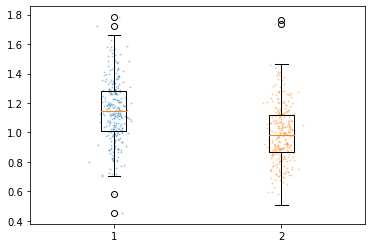

In [10]:
# for dna

# 
g1 = analysis_df['normalized_inc_dna']
g2 = analysis_df['normalized_subset_control_dna']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 1.8239433221666958e-93


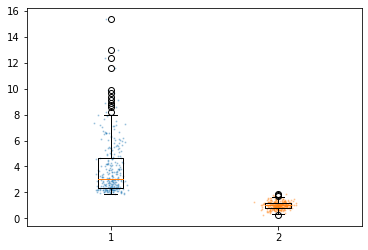

In [11]:
# for mdc1

# 
g1 = analysis_df['normalized_inc_Mdc1']
g2 = analysis_df['normalized_subset_control_Mdc1']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 0.0063453475021402845


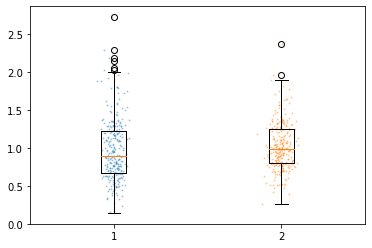

In [12]:
# For Pol2S5
g1 = analysis_df['normalized_inc_Pol2S5']
g2 = analysis_df['normalized_subset_control_Pol2S5']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 5.199417427217721e-14


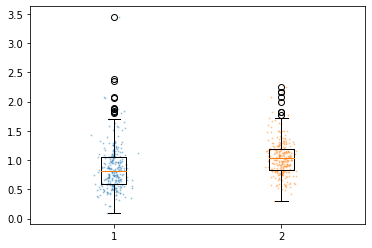

In [13]:
# For Pol2S5 norm to dna
g1 = analysis_df['normalized_inc_Pol2S5']/analysis_df['normalized_inc_dna']
g2 = analysis_df['normalized_subset_control_Pol2S5']/analysis_df['normalized_subset_control_dna']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 0.03687007930858399


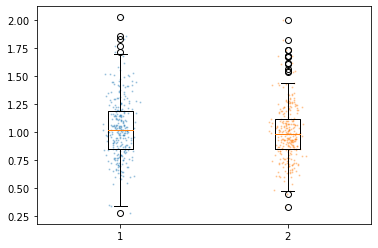

In [14]:
# For H2ax
g1 = analysis_df['normalized_inc_H3K27ac']
g2 = analysis_df['normalized_subset_control_H3K27ac']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)


from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)
from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 1.915596549037122e-06


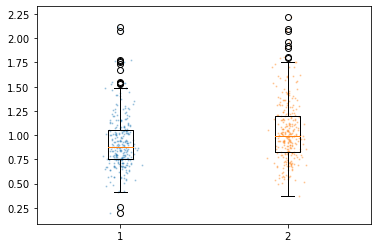

In [15]:
# For H2ax
g1 = analysis_df['normalized_inc_H3K27ac']/analysis_df['normalized_inc_dna']
g2 = analysis_df['normalized_subset_control_H3K27ac']/analysis_df['normalized_subset_control_dna']
#g3 = no_damaged_chr_df['normalized_inc_Pol2S5']
#g4 = analysis_df['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)

boxplot_pol2= plt.boxplot([g1,g2], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([g1,g2]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)


from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)
from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

In [23]:
from scipy import stats
stats.spearmanr(analysis_df['normalized_inc_Pol2S5']/analysis_df['normalized_inc_dna'], 
                analysis_df['normalized_inc_H3K27ac']/analysis_df['normalized_inc_dna'])


stats.spearmanr(analysis_df['normalized_inc_Pol2S5'], 
                analysis_df['normalized_inc_H3K27ac'])

SpearmanrResult(correlation=0.3149367794414287, pvalue=7.286863721557315e-08)

SpearmanrResult(correlation=0.3149367794414287, pvalue=7.286863721557315e-08)

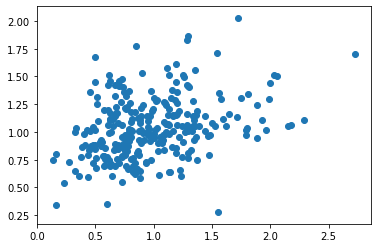

In [25]:
plt.scatter(x= analysis_df['normalized_inc_Pol2S5'], 
            y =analysis_df['normalized_inc_H3K27ac'])

stats.spearmanr(analysis_df['normalized_inc_Pol2S5'], 
                analysis_df['normalized_inc_H3K27ac'])

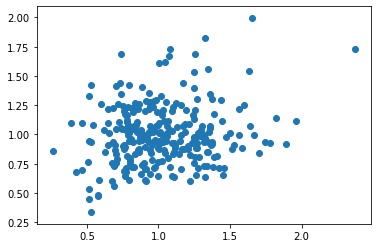

In [18]:
plt.scatter(x= analysis_df['normalized_subset_control_Pol2S5'], y =analysis_df['normalized_subset_control_H3K27ac'])

In [19]:
stats.spearmanr(analysis_df['normalized_subset_control_Pol2S5'], analysis_df['normalized_subset_control_H3K27ac'])

SpearmanrResult(correlation=0.08424761248776862, pvalue=0.15974597913514577)